#TD3 - Diagnostic du cancer du sein 

In [507]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Colonnes inutiles:
On va supprimer les colonnes qui ne sont pas utiles pour la prédiction du cancer du sein:
- 'Unnamed: 32' : colonne vide
- 'id' : identifiant du patient

### Sortie attendues:
- 'diagnosis' : M = Maligne, B = Bénigne

### Valeurs des données:
Certaines données sont trop élevée par rapport a d'autre. Il faut donc les standardiser. Car cela fausse le biais.

### Standardiser:
Pour standardiser: (x - moyenne) / ecart-type

In [508]:
import sklearn as sk
from sklearn import preprocessing

# change diagnosis column to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
# drop id and Unnamed: 32 columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# standardize data without diagnosis column
X = df.values[:,1:]
X_standardized = preprocessing.scale(X)

# add diagnosis column to standardize data
X_standardized = np.insert(X_standardized, 0, df['diagnosis'], axis=1)

# back to dataframe
X_normalized = pd.DataFrame(X_standardized)
X_normalized.columns = df.columns

X_normalized.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [509]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized.values[:,1:], X_normalized.values[:,0], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(455, 30)
(114, 30)
(455,)
(114,)


### Nombres d'entrées
30 entrées

### Nombres de sorties
1 sortie

### Fontions d'activation
- Sigmoid

In [510]:
import os
import torch
import torch.nn as nn
from torch.nn.modules.activation import Threshold
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

In [511]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [512]:
class DNN(nn.Module):
    """
    DNN class

    Args:
        input_size (int): input size of the neural network
        hidden_size (int): hidden size of the neural network
        output_size (int): output size of the neural network

    Attributes:
        archiNN (torch.nn.Sequential): neural network architecture
    """
    def __init__(self, input_size, hidden_size, output_size):
        """
        DNN class constructor

        Parameters:
        ----------
        input_size (int): input size of the neural network
        hidden_size (int): hidden size of the neural network
        output_size (int): output size of the neural network

        Returns:
        -------
        None
        """
        super().__init__()
        self.archiNN = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.archiNN(x)
    
model = DNN(30, 32, 1).to(device)

In [513]:
batch_size = 8

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [514]:
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []

test_losses = []
test_accuracies = []
test_precisions = []
test_recalls = []

In [515]:
def train(train_loader, model, loss_fn, optimizer):
    model.train()
    size = len(train_loader.dataset)
    epoch_loss = 0.0
    correct = 0
    total = 0
    nombre_vp = 0
    nombre_fp = 0
    nombre_fn = 0

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()

        y_pred = model(X)
        y_pred = y_pred.squeeze()
        loss = loss_fn(y_pred, y)
        epoch_loss += loss.item()

        loss.backward()
        optimizer.step()

        predictions = y_pred >= 0.5
        correct += (predictions == y).sum().item()
        total += y.size(0)

        nombre_vp += ((predictions == 1) & (y == 1)).sum().item()
        nombre_fp += ((predictions == 1) & (y == 0)).sum().item()
        nombre_fn += ((predictions == 0) & (y == 1)).sum().item()

    epoch_loss /= size
    epoch_accuracy = correct / total
    epoch_precision = nombre_vp / (nombre_vp + nombre_fp + 1e-12)
    epoch_recall = nombre_vp / (nombre_vp + nombre_fn + 1e-12)

    return epoch_loss, epoch_accuracy, epoch_precision, epoch_recall

In [516]:
def test(test_loader, model, loss_fn):
    model.eval()
    size = len(test_loader.dataset)
    epoch_loss = 0.0
    correct = 0
    total = 0
    nombre_vp = 0
    nombre_fp = 0
    nombre_fn = 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            pred = pred.squeeze()
            loss = loss_fn(pred, y.view_as(pred))
            epoch_loss += loss.item()

            predictions = pred >= 0.5
            correct += (predictions == y).sum().item()
            total += y.size(0)

            nombre_vp += ((predictions == 1) & (y == 1)).sum().item()
            nombre_fp += ((predictions == 1) & (y == 0)).sum().item()
            nombre_fn += ((predictions == 0) & (y == 1)).sum().item()

    epoch_loss /= size
    epoch_accuracy = correct / total
    epoch_precision = nombre_vp / (nombre_vp + nombre_fp + 1e-12)
    epoch_recall = nombre_vp / (nombre_vp + nombre_fn + 1e-12)

    return epoch_loss, epoch_accuracy, epoch_precision, epoch_recall

In [517]:
for epoch in notebook_tqdm.tqdm(range(80)):
    train_loss, train_accuracy, train_precision, train_recall = train(train_loader, model, loss_fn, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)

    test_loss, test_accuracy, test_precision, test_recall = test(test_loader, model, loss_fn)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)

100%|██████████| 80/80 [00:03<00:00, 22.85it/s]


<Figure size 640x480 with 0 Axes>

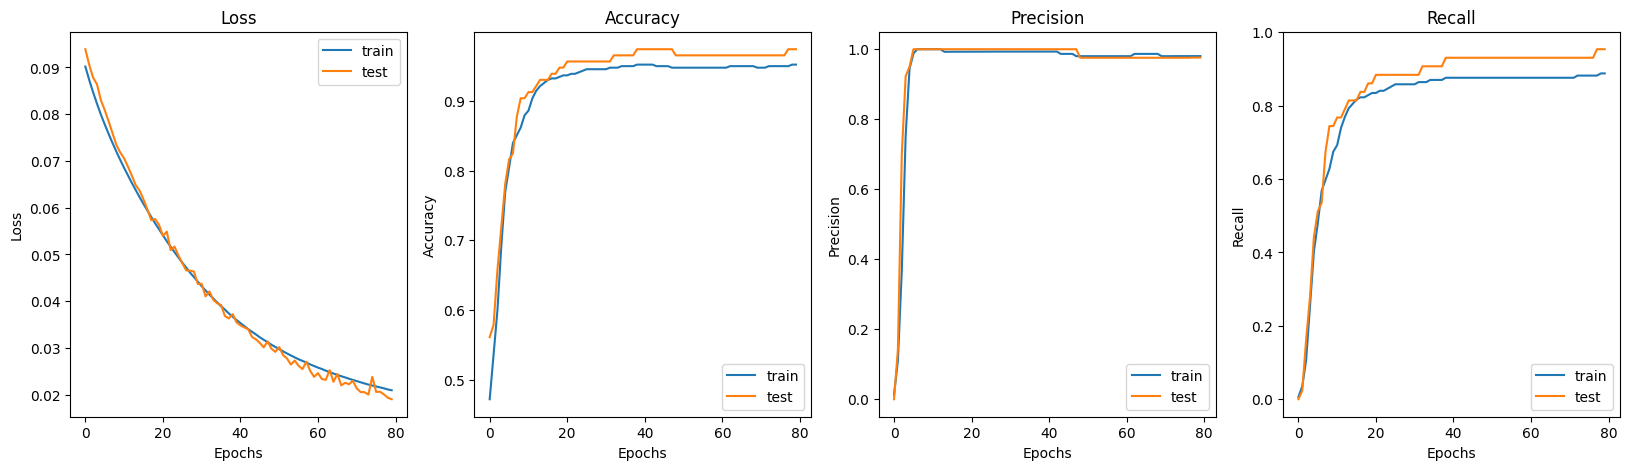

In [518]:
plt.clf()

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 4, 2)
plt.plot(train_accuracies, label='train')
plt.plot(test_accuracies, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.subplot(1, 4, 3)
plt.plot(train_precisions, label='train')
plt.plot(test_precisions, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision')

plt.subplot(1, 4, 4)
plt.plot(train_recalls, label='train')
plt.plot(test_recalls, label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall')

plt.show()